# Heart Atack

Data from Kaggle website:

https://www.kaggle.com/datasets/rashikrahmanpritom/heart-attack-analysis-prediction-dataset \

- Age : Age of the patient

- Sex : Sex of the patient

- exang: exercise induced angina (1 = yes; 0 = no)

- ca: number of major vessels (0-3)

- cp : Chest Pain type chest pain type
    - Value 1: typical angina
    - Value 2: atypical angina
    - Value 3: non-anginal pain
    - Value 4: asymptomatic
    - trtbps : resting blood pressure (in mm Hg)

- chol : cholestoral in mg/dl fetched via BMI sensor

- fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

- rest_ecg : resting electrocardiographic results
    - Value 0: normal
    - Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    - Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

- thalach : maximum heart rate achieved

- target : 
    - 0= less chance of heart attack
    - 1= more chance of heart attack

In [216]:
# Import library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.model_selection import GridSearchCV as gsc
from sklearn.compose import ColumnTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [217]:
# Read csv file

df = pd.read_csv('heart.csv', sep=',')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [218]:
# Shape of DataFrame. There are 303 rows and 14 columns

df.shape

(303, 14)

In [219]:
# Check if there are any NaN data

df.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [220]:
# Check if there are duplicated data

df_duplicated = df.loc[df.duplicated()]
df_duplicated

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [221]:
# Erase the duplicated data

df.drop_duplicates(inplace=True)

# Graphs

<AxesSubplot:xlabel='thall', ylabel='count'>

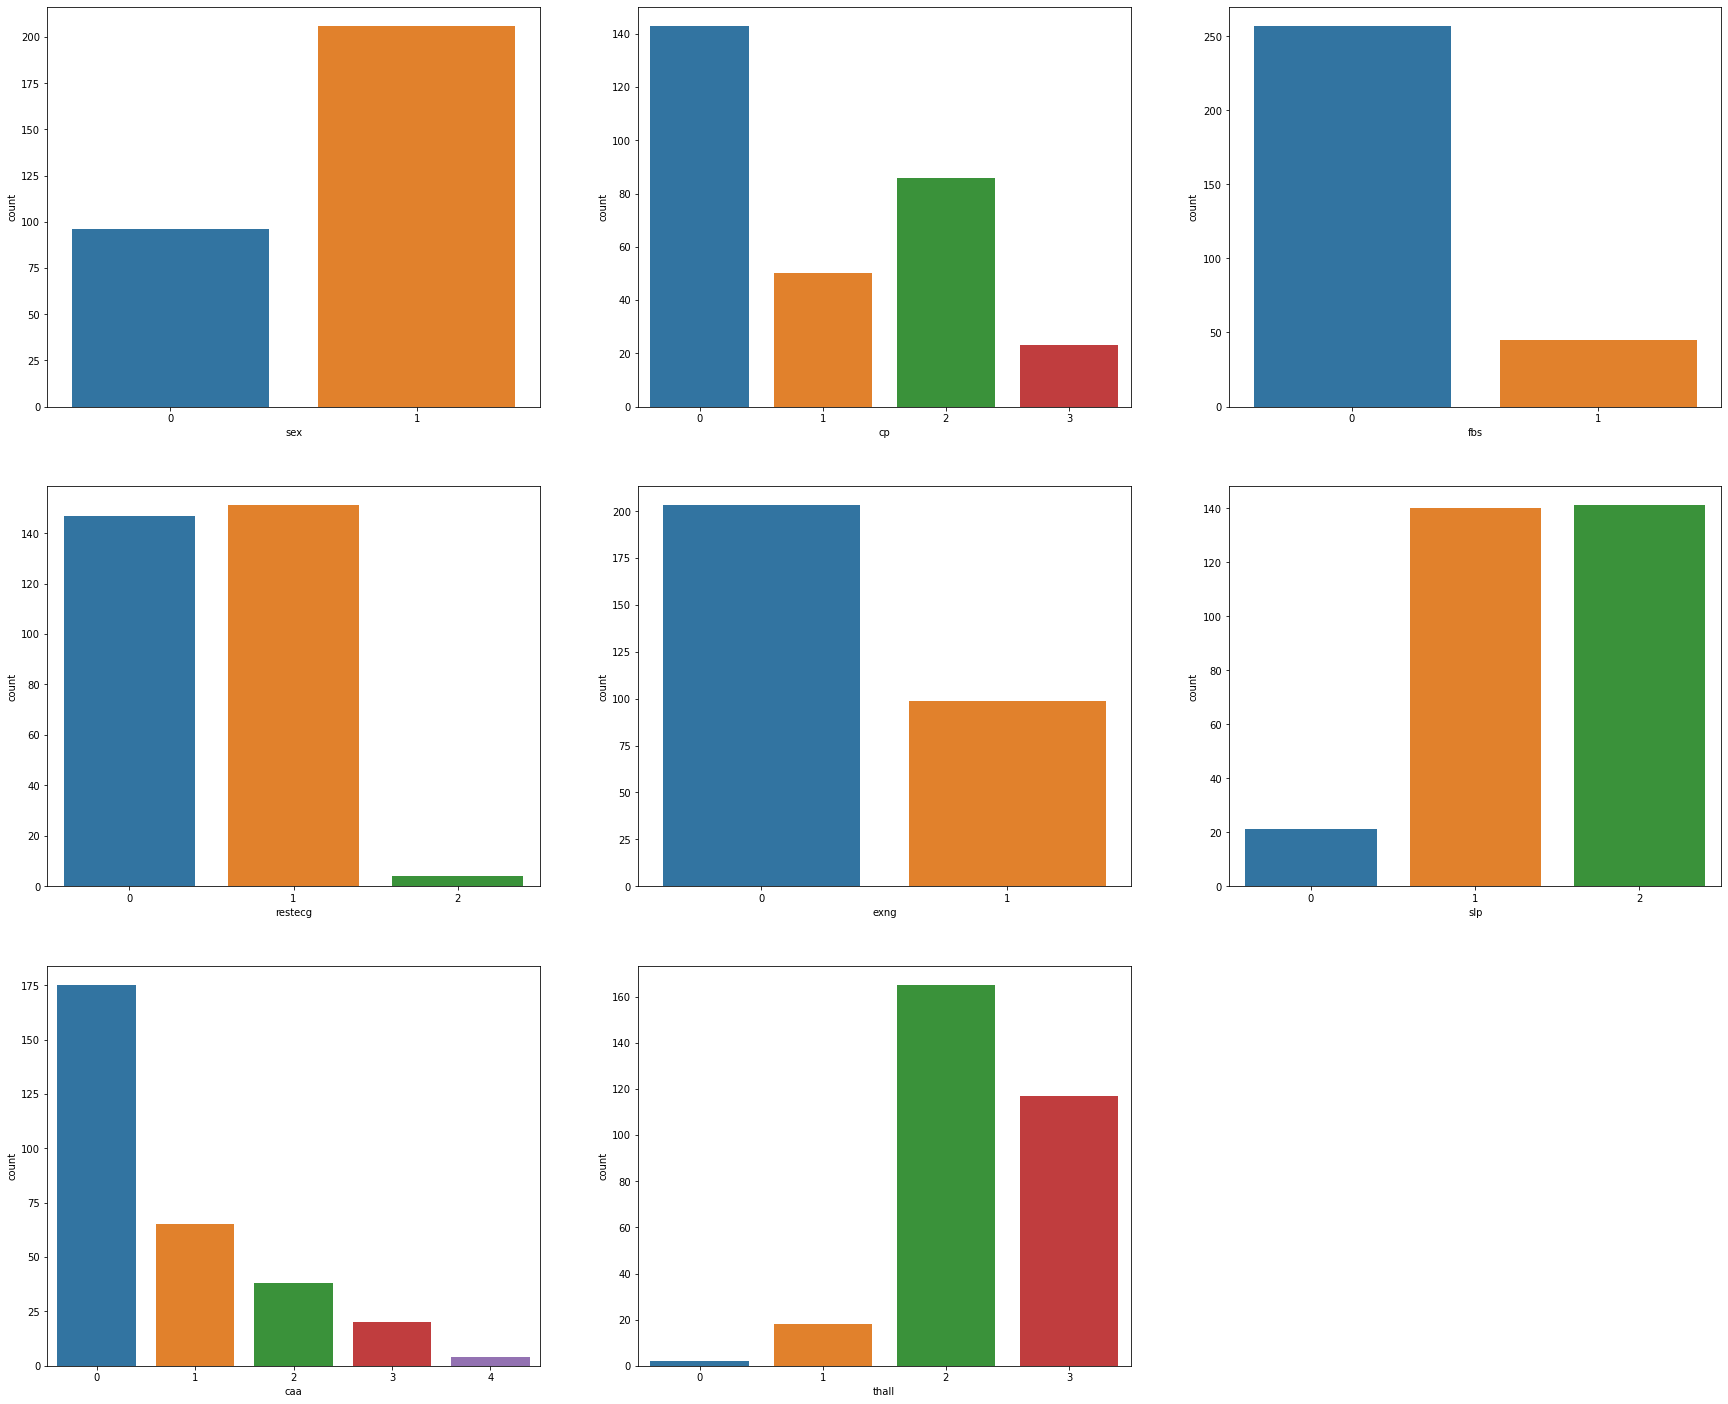

In [222]:
plt.figure(figsize=(30,25))

plt.subplot(3,3,1)
sns.countplot(data=df, x='sex')

plt.subplot(3,3,2)
sns.countplot(data=df, x='cp')

plt.subplot(3,3,3)
sns.countplot(data=df, x='fbs')

plt.subplot(3,3,4)
sns.countplot(data=df, x='restecg')

plt.subplot(3,3,5)
sns.countplot(data=df, x='exng')

plt.subplot(3,3,6)
sns.countplot(data=df, x='slp')

plt.subplot(3,3,7)
sns.countplot(data=df, x='caa')

plt.subplot(3,3,8)
sns.countplot(data=df, x='thall')

# Histograms

<AxesSubplot:xlabel='oldpeak', ylabel='Count'>

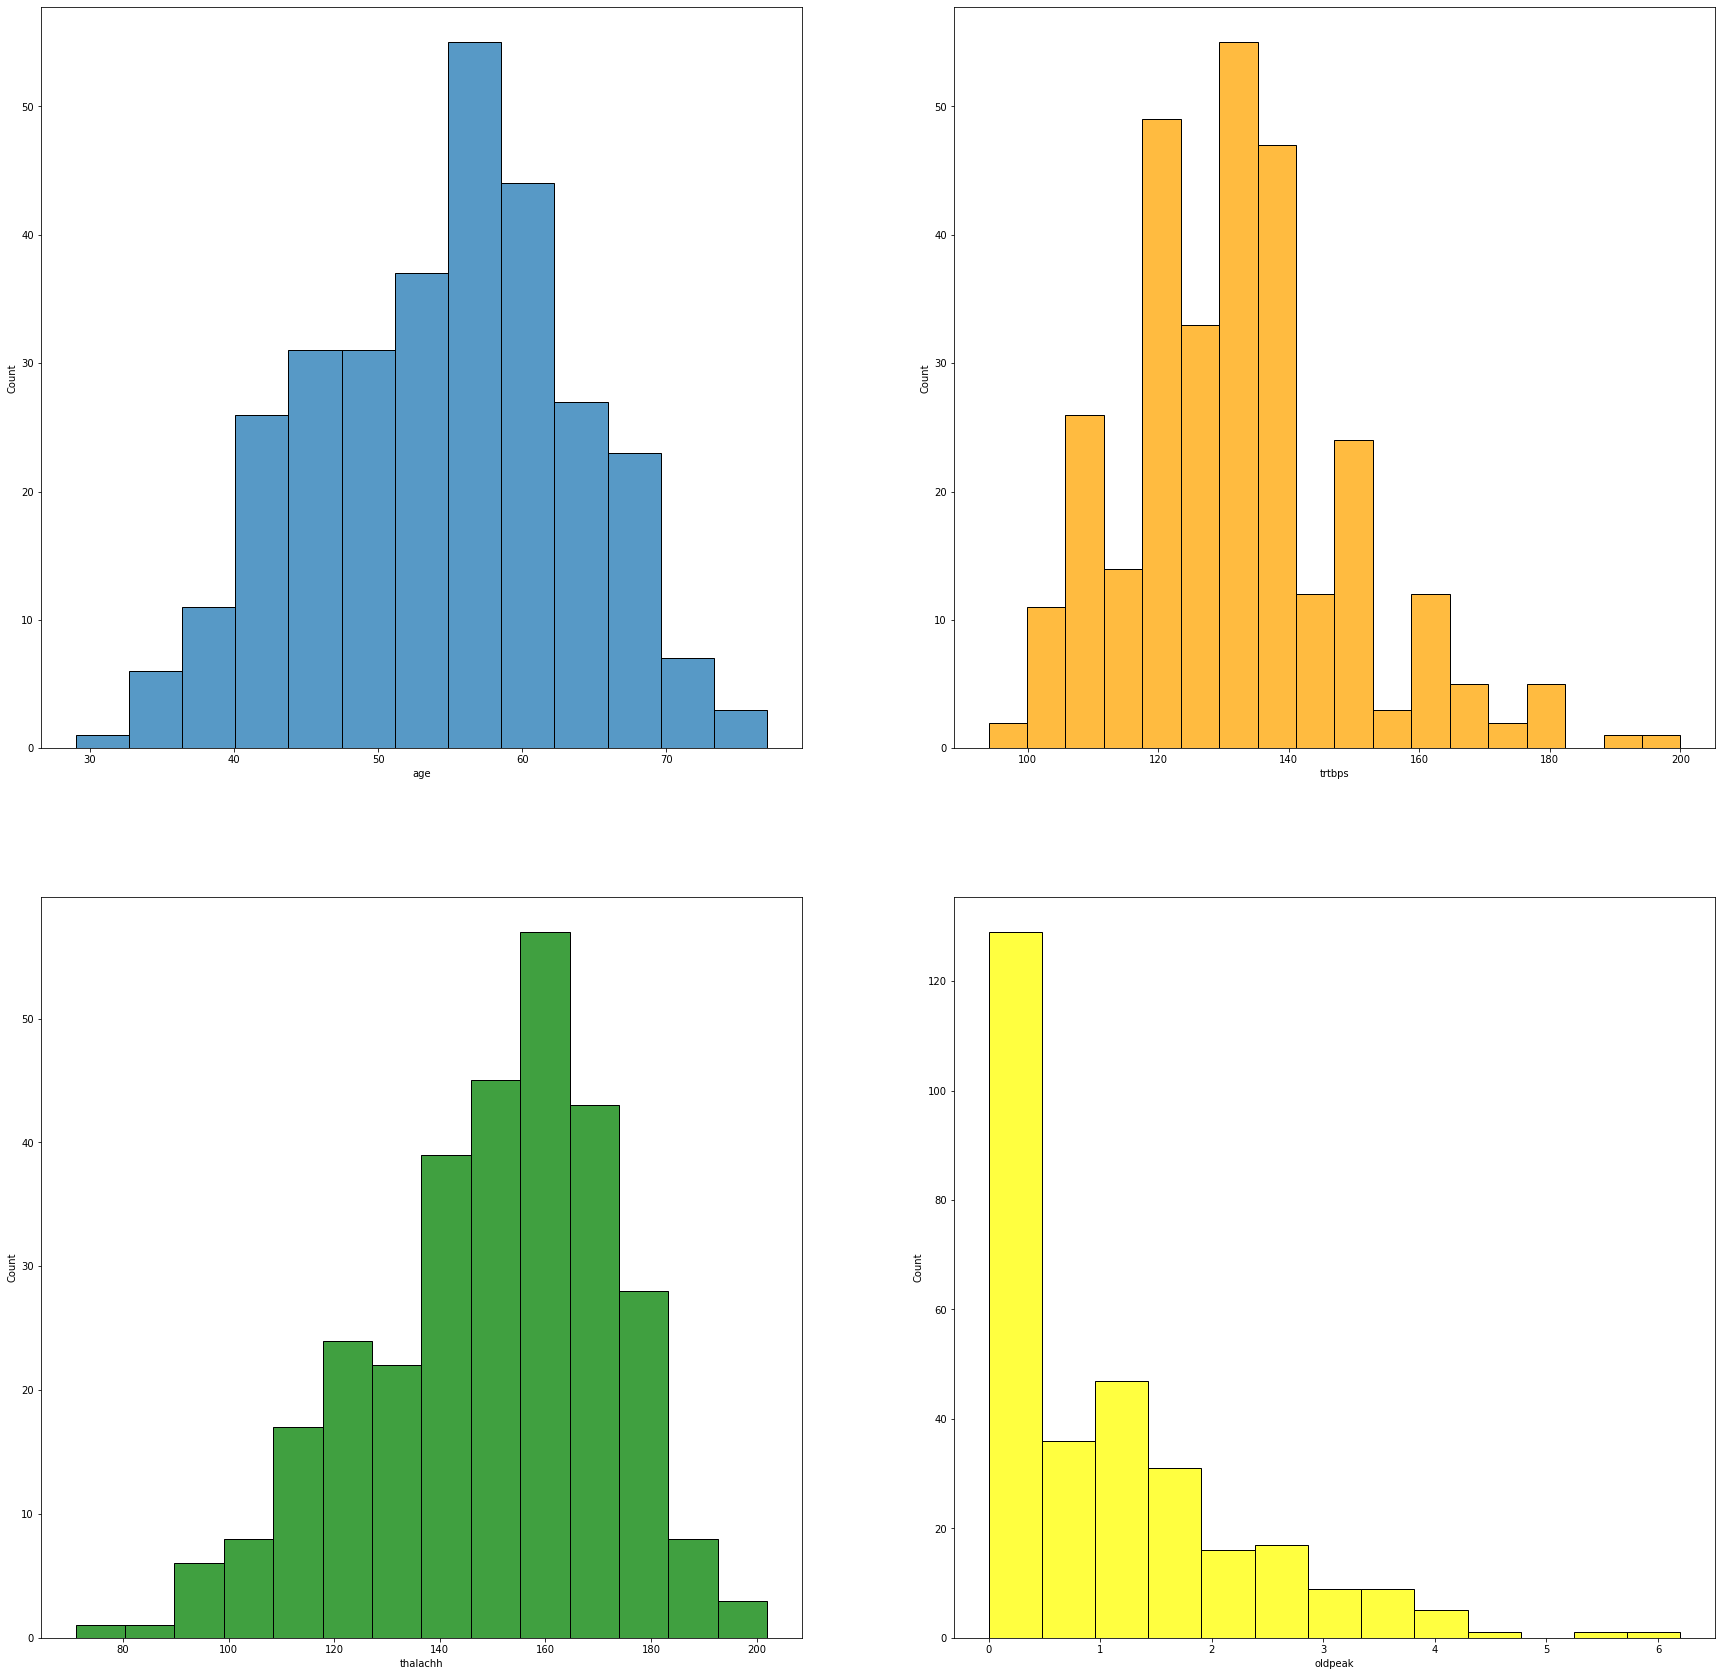

In [223]:
plt.figure(figsize=(30,30))

plt.subplot(2,2,1)
sns.histplot(data=df, x='age')

plt.subplot(2,2,2)
sns.histplot(data=df, x='trtbps', color='orange')

plt.subplot(2,2,3)
sns.histplot(data=df, x='thalachh', color='green')

plt.subplot(2,2,4)
sns.histplot(data=df, x='oldpeak', color='yellow')


# Data Analysis

In [224]:
# Split the data

prev = df.iloc[:, 0:-1]
aim = df.iloc[:, -1].values

In [225]:
# Transform a categorical data in numerical data - Not used

In [226]:
# Using OneHotEncoder to remove the weight of the some colums
# cp, restecg, slp, caa, thall
transf_data = ColumnTransformer(transformers=[('One', OneHotEncoder(),
                                             ['cp', 'restecg', 'slp', 'caa', 'thall'])],
                              remainder = 'passthrough').fit_transform(prev)

In [227]:
# Scale the data

trans_data_scale = StandardScaler().fit_transform(transf_data)

In [228]:
# Create a dataframe

df_trans_data = pd.DataFrame(trans_data_scale)

In [229]:
# Split the data

x_train, x_test, y_train, y_test = train_test_split(df_trans_data, aim, test_size=0.3, random_state = 1)

In [230]:
x_train.shape

(211, 27)

In [231]:
x_test.shape

(91, 27)

In [232]:
y_train.shape

(211,)

In [233]:
y_test.shape

(91,)

## Naive Bayes

In [234]:
model_naive = GaussianNB()

In [235]:
model_naive.fit(x_train, y_train)

GaussianNB()

In [236]:
predict_naive = model_naive.predict(x_test)

In [237]:
# Accuracy test

acc_naive = accuracy_score(y_test, predict_naive)
acc_naive

0.7692307692307693

In [238]:
confusion_matrix(y_test, predict_naive)

array([[28, 10],
       [11, 42]], dtype=int64)

In [239]:
print(classification_report(y_test, predict_naive))

              precision    recall  f1-score   support

           0       0.72      0.74      0.73        38
           1       0.81      0.79      0.80        53

    accuracy                           0.77        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.77      0.77      0.77        91



In [240]:
# Validação Cruzada
# Split the data in small groups

split_data = KFold(n_splits= 30, shuffle=True, random_state = 5)

In [241]:
# Create a model

new_model = GaussianNB()
cross_val_score(new_model, df_trans_data, aim, cv = split_data).mean()

0.8212121212121211

## SVM

In [242]:
grid_param_svm = {'C':[1, 2, 3, 4, 5, 10],
                 'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
                 'gamma': ['auto', 'scale'],
                 'tol':[0.01, 0.001, 0.0001]}

In [243]:
grid_svm = gsc(SVC(), grid_param_svm, refit = True, verbose = 1,n_jobs=-1)

In [244]:
grid_svm.fit(x_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 2, 3, 4, 5, 10], 'gamma': ['auto', 'scale'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'tol': [0.01, 0.001, 0.0001]},
             verbose=1)

In [245]:
print(grid_svm.best_params_)

{'C': 2, 'gamma': 'auto', 'kernel': 'sigmoid', 'tol': 0.01}


In [246]:
svm_test = SVC(gamma='auto', kernel='sigmoid', random_state=42, C = 2, tol = 0.01)

In [247]:
svm_test.fit(x_train, y_train)

SVC(C=2, gamma='auto', kernel='sigmoid', random_state=42, tol=0.01)

In [248]:
predict_svm = svm_test.predict(x_test)

In [249]:
acc_svm = accuracy_score(y_test, predict_svm)
acc_svm

0.8021978021978022

In [250]:
# Cross Validation

k_fold_svm = KFold(n_splits=30,
                  shuffle = True,
                  random_state = 5)

In [251]:
# Create a model

model_svm = SVC()
cross_val_score(model_svm, df_trans_data, aim, cv=k_fold_svm).mean()

0.8206060606060605

In [252]:
predic_train = grid_svm.predict(x_train)

In [253]:
accuracy_score(y_train, predic_train)

0.8530805687203792

# Logistic Regression

In [254]:
# Create a variable and call the function

logistic_test = LogisticRegression(C=4, max_iter=100, penalty='l1', solver= 'liblinear', tol= 0.001)

In [255]:
#Input the x_train and y_train

logistic_test.fit(x_train, y_train)

LogisticRegression(C=4, penalty='l1', solver='liblinear', tol=0.001)

In [256]:
# Check the intercept
logistic_test.intercept_

array([-0.08142711])

In [257]:
# Check the coefficient
logistic_test.coef_

array([[-1.19052943,  0.        ,  0.24255759,  0.15236047, -0.32408289,
         0.01726997,  0.        ,  0.27957762, -0.630076  ,  0.        ,
         0.70319584, -0.55439885, -0.92272248,  0.        ,  0.02088944,
        -0.12094718,  0.20074828,  0.        , -0.45139939,  0.41030885,
        -1.53418303, -0.68293348, -0.30472488,  0.22674347,  1.43052876,
        -0.56458202, -0.67703978]])

In [258]:
# Create a variable to predict the function
predict_logistic = logistic_test.predict(x_test)

In [259]:
# Check the results
# Accuracy
acc_logis = accuracy_score(y_test, predict_logistic)
acc_logis

0.8241758241758241

In [260]:
# Confusion matrix
confusion_matrix(y_test, predict_logistic)

array([[32,  6],
       [10, 43]], dtype=int64)

In [261]:
# Classsification report
print(classification_report(y_test, predict_logistic))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80        38
           1       0.88      0.81      0.84        53

    accuracy                           0.82        91
   macro avg       0.82      0.83      0.82        91
weighted avg       0.83      0.82      0.83        91



In [262]:
# Predict the data with x_train
predict_logistic_train = logistic_test.predict(x_train)

In [263]:
# Accuracy
accuracy_score(y_train, predict_logistic_train)

0.9004739336492891

In [264]:
# Cross Validation
# Split data in small groups
kfold_logistic = KFold(n_splits=20,
                      shuffle = True,
                      random_state= 5)

In [265]:
model_logistic = LogisticRegression()

In [266]:
cross_val_score(model_logistic, df_trans_data, aim, cv = kfold_logistic).mean()

0.8441666666666666

# Comparing the methods

In [267]:
acc_score_all = {'acc_method': ['SVM', 'Naive', 'Logistic Regression'], 'acc_score': [acc_svm, acc_naive, acc_logis]}
df_acc_score = pd.DataFrame(data=acc_score_all).sort_values(by='acc_score')

Text(0, 0.5, 'ACCURACY SCORE')

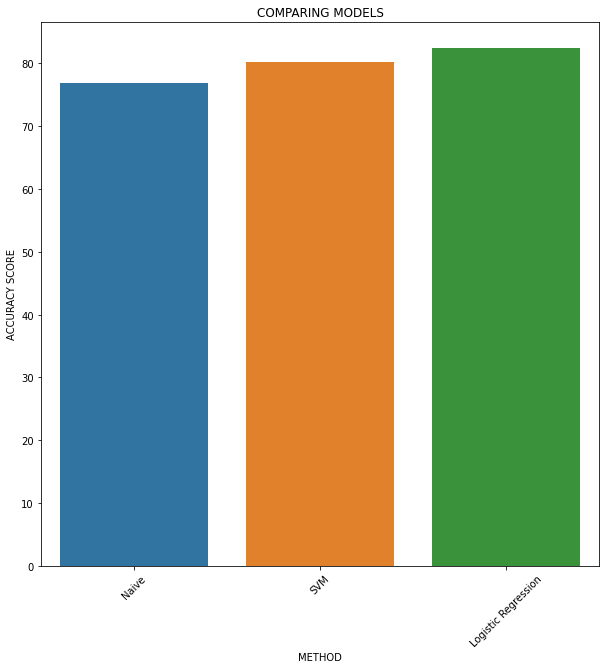

In [268]:
plt.figure(figsize=(10,10))

sns.barplot(data=df_acc_score, x = df_acc_score['acc_method'], y = df_acc_score['acc_score']*100)

plt.title('COMPARING MODELS')
plt.xlabel('METHOD')
plt.xticks(rotation=45)

plt.ylabel('ACCURACY SCORE')

